In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
simple_train = ['call you tonight', 'Call me a cab', 'Please call me... PLEASE!']

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(simple_train)
vect.get_feature_names_out()

array(['cab', 'call', 'me', 'please', 'tonight', 'you'], dtype=object)

In [4]:
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [5]:
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]], dtype=int64)

In [6]:
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [7]:
print(type(simple_train_dtm))

print(simple_train_dtm)

<class 'scipy.sparse._csr.csr_matrix'>
  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [8]:
simple_test = ["please don't call me"]

In [9]:
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]], dtype=int64)

In [10]:
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


In [13]:
sms = pd.read_csv("C:/Users/03312360099/Downloads/sms+spam+collection/Spam",sep="\t")
sms.dropna(how ="any", inplace=True, axis=1)
sms.columns = ["label", "message"]
sms

,label,message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...


In [14]:
sms.describe()

,label,message
count,5571,5571
unique,2,5168
top,ham,"Sorry, I'll call later"
freq,4824,30


In [15]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4824   4515                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

We have `4825` ham message and `747` spam message

In [16]:
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})
sms.head()

,label,message,label_num
0,ham,Ok lar... Joking wif u oni...,0
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
2,ham,U dun say so early hor... U c already then say...,0
3,ham,"Nah I don't think he goes to usf, he lives aro...",0
4,spam,FreeMsg Hey there darling it's been 3 week's n...,1


In [17]:
sms['message_len'] = sms.message.apply(len)
sms.head()

,label,message,label_num,message_len
0,ham,Ok lar... Joking wif u oni...,0,29
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
2,ham,U dun say so early hor... U c already then say...,0,49
3,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
4,spam,FreeMsg Hey there darling it's been 3 week's n...,1,147


Text(0.5, 0, 'Message Length')

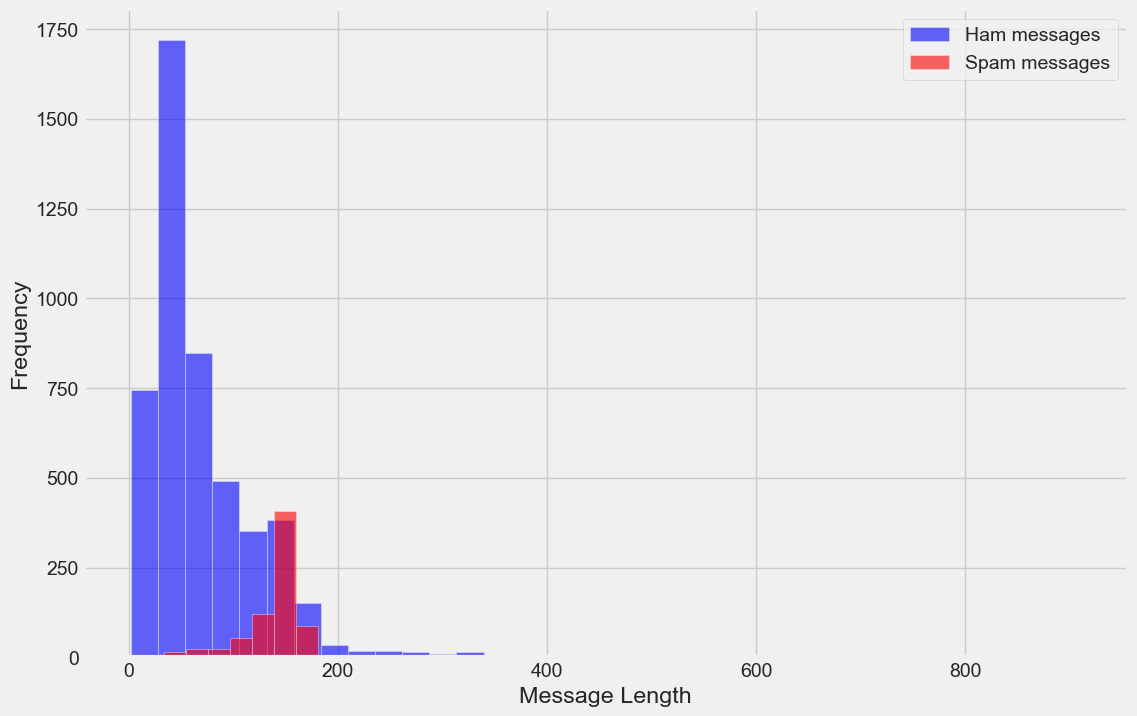

In [18]:
plt.figure(figsize=(12, 8))

sms[sms.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue',
                                       label='Ham messages', alpha=0.6)
sms[sms.label=='spam'].message_len.plot(kind='hist', color='red',
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [19]:
sms[sms.label=='ham'].describe()

,label_num,message_len
count,4824.0,4824.000000
mean,0.0,71.474295
std,0.0,58.443940
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,93.000000
max,0.0,910.000000


In [20]:
sms[sms.label=='spam'].describe()

,label_num,message_len
count,747.0,747.000000
mean,1.0,138.670683
std,0.0,28.873603
min,1.0,13.000000
25%,1.0,133.000000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,223.000000


In [21]:
sms[sms.message_len == 223].message.iloc[0]

'Hi, this is Mandy Sullivan calling from HOTMIX FM...you are chosen to receive £5000.00 in our Easter Prize draw.....Please telephone 09041940223 to claim before 29/03/05 or your prize will be transferred to someone else....'

In [22]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\03312360099\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
sms.head()

,label,message,label_num,message_len
0,ham,Ok lar... Joking wif u oni...,0,29
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
2,ham,U dun say so early hor... U c already then say...,0,49
3,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
4,spam,FreeMsg Hey there darling it's been 3 week's n...,1,147


In [24]:
sms['clean_msg'] = sms.message.apply(text_process)

sms.head()

,label,message,label_num,message_len,clean_msg
0,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
2,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
3,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though
4,spam,FreeMsg Hey there darling it's been 3 week's n...,1,147,FreeMsg Hey darling 3 weeks word back Id like ...


In [25]:
type(stopwords.words('english'))

list

In [26]:
from collections import Counter

words = sms[sms.label=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)

print(ham_words.most_common(50))

[('get', 303), ('ltgt', 276), ('ok', 273), ('go', 249), ('ill', 238), ('know', 232), ('like', 231), ('got', 231), ('call', 231), ('come', 227), ('good', 224), ('love', 190), ('time', 189), ('day', 188), ('going', 167), ('want', 164), ('one', 163), ('home', 160), ('lor', 160), ('need', 157), ('sorry', 153), ('still', 147), ('see', 138), ('n', 136), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 127), ('today', 125), ('send', 123), ('tell', 121), ('cant', 119), ('hi', 117), ('take', 112), ('oh', 112), ('much', 112), ('night', 109), ('happy', 106), ('hey', 106), ('way', 100), ('hope', 100), ('great', 99), ('pls', 98), ('work', 97), ('thats', 95), ('give', 94), ('dear', 94), ('wat', 94)]


In [27]:
words = sms[sms.label=='spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)

print(spam_words.most_common(50))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('stop', 115), ('claim', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 68), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('16', 51), ('guaranteed', 50), ('customer', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('box', 33), ('every', 33), ('message', 32), ('po', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('£2000', 31), ('go', 31), ('number', 30), ('apply', 29), ('code', 29)]


In [28]:
#split X and y into training and testing sets
from sklearn.model_selection import train_test_split

#how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = sms.clean_msg
y = sms.label_num
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5571,)
(5571,)
(4456,)
(4456,)
(1115,)
(1115,)


> There are a lot of arguments and parameters that can be passed to the CountVectorizer. In this case we will just specify the **analyzer** to be our own previously defined function:

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(X_train)

X_train_dtm = vect.transform(X_train)

X_train_dtm = vect.fit_transform(X_train)

print(type(X_train_dtm), X_train_dtm.shape)

X_test_dtm = vect.transform(X_test)
print(type(X_test_dtm), X_test_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (4456, 8296)
<class 'scipy.sparse._csr.csr_matrix'> (1115, 8296)


In [30]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<4456x8296 sparse matrix of type '<class 'numpy.float64'>'
	with 37042 stored elements in Compressed Sparse Row format>

In [32]:
#import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [33]:
#train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


MultinomialNB()

In [34]:
from sklearn import metrics

# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
print("=======Confision Matrix===========")
metrics.confusion_matrix(y_test, y_pred_class)

=======Accuracy Score===========
0.9829596412556054
=======Confision Matrix===========


array([[958,  11],
       [  8, 138]], dtype=int64)

In [36]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_class)

0.9669267851336641

In [37]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()),
                 ('tfid', TfidfTransformer()),
                 ('model', MultinomialNB())])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred))

# print the confusion matrix
print("=======Confision Matrix===========")
metrics.confusion_matrix(y_test, y_pred)

=======Accuracy Score===========
0.968609865470852
=======Confision Matrix===========


array([[969,   0],
       [ 35, 111]], dtype=int64)

In [38]:
#import an instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')

#train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

CPU times: total: 0 ns
Wall time: 18 ms


LogisticRegression(solver='liblinear')

In [39]:
y_pred_class = logreg.predict(X_test_dtm)

In [42]:
#calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

#print the confusion matrix
print("=======Confision Matrix===========")
print(metrics.confusion_matrix(y_test, y_pred_class))

#calculate AUC
print("=======ROC AUC Score===========")
print(metrics.roc_auc_score(y_test, y_pred_class))

=======Accuracy Score===========
0.9802690582959641
=======Confision Matrix===========
[[968   1]
 [ 21 125]]
=======ROC AUC Score===========
0.9275661959087889
